**INSTRUCTIONS**

This is a google colab notebook

In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [35]:
#importing libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

#**1) REGRESSION**

Please find the Diamond Price Prediction Data set https://drive.google.com/drive/folders/1qE1tm3Ke3uotTyv6SUqruI09t-AkcwRK?usp=sharing. "description.txt" contains the feature description of data, "diamonds.csv" has the data.

In [ ]:
## Importing the MinMax Scaler
#changing the scale
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()


In [ ]:
# Get the file
downloaded = drive.CreateFile({'id': '1KZkkbIJurfMnsdzcluLZfAG-0Bv8OtcK'}) # replace the id with id of file you want to access
downloaded.GetContentFile('diamonds.csv') 

In [ ]:
data = pd.read_csv('diamonds.csv')
data.shape

(53940, 10)

In [ ]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
#data.dtypes

In [ ]:
data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [ ]:
#seperating independent and dependent variables
# Using 'price' as Target variable
x = data.drop(['price'], axis=1)
y = data['price']
x.shape, y.shape

((53940, 9), (53940,))

In [ ]:
y=data['cut']
y.unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [ ]:
def rep_cut(x):
  if x=='Ideal':
    return 0
  elif x == 'Premium':
    return 1
  if x == 'Good':
    return 2
  if x == 'Very Good':
    return 3
  if x=='Fair':
    return 4

data['cut'] = data['cut'].apply(rep_cut)                   



In [ ]:
y=data['color']
y.unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [ ]:

def rep_color(x):
    if x=='D':
        return 0
    elif x=='E':
        return 1
    elif x=='F':
        return 2
    elif x=='G':
        return 3
    elif x=='H':
        return 4
    elif x=='I':
        return 5       
    elif x=='J':
        return 6         
data['color']=data['color'].apply(rep_color)

In [ ]:
y = data['clarity']
y.unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [ ]:
def rep_clarity(x):
    if x=='SI1':
        return 0
    elif x=='SI2':
        return 1
    elif x=='VS1':
        return 2
    elif x=='VS2':
        return 3
    elif x=='VVS1':
        return 4
    elif x=='VVS2':
        return 5       
    elif x=='I1':
        return 6  
    elif x=='IF':
        return 7           
data['clarity']=data['clarity'].apply(rep_clarity)

In [ ]:
# Importing the train test split function
from sklearn.model_selection import train_test_split
x = data.drop(['price'], axis=1)
y = data['price']



In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.40,random_state=101) #train:test =60:40

**KNN Regression [Diamond Price Prediction Dataset]**

In [ ]:
# code for knn regression

In [ ]:
#importing KNN regressor and metric mse

from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.metrics import mean_squared_error as mse

In [ ]:
# Creating instance of KNN (just for testing)
reg = KNN(n_neighbors = 50)

# Fitting the model
reg.fit(x_train, y_train)

# Predicting over the Train Set and calculating MSE
test_predict = reg.predict(x_test)
var = mse(test_predict, y_test)
print('Test MSE    ', var )

Test MSE     1269766.8985829626


Elbow function (will finally be utilised for getting best k)

In [ ]:
def Elbow(K):
  #initiating empty list
    test_mse = []
  
  #training model for evey value of K
    for i in K:
        #Instance of KNN
        reg = KNN(n_neighbors = i)
        reg.fit(x_train, y_train)
        #Appending mse value to empty list claculated using the predictions
        tmp = reg.predict(x_test)
        tmp = mse(tmp,y_test)
        test_mse.append(tmp)
    
    return test_mse

In [ ]:
#Defining K range
# took max k value=sqrt(size of train data)  [size = no. of tuples]
k = range(1,180)
type(k)

range

In [ ]:
# calling above defined function
test = Elbow(k)

In [ ]:
test

[1324952.6128105302,
 1077205.3755098258,
 1001861.189304989,
 966098.5411133899,
 945234.0865702633,
 948603.869336557,
 943157.9680086719,
 946798.9531242758,
 951383.3539489463,
 955079.5150097329,
 961738.0092270414,
 974816.6250061153,
 988734.382599667,
 1001110.8589040734,
 1009505.340610349,
 1014465.5182919897,
 1024567.2432134962,
 1032317.7807411756,
 1044295.6818651482,
 1052149.2086837227,
 1065874.149496333,
 1076982.4155502978,
 1082312.1665706418,
 1087134.5215654837,
 1095640.2952708194,
 1101741.0436167708,
 1109091.3896097909,
 1115699.1707811565,
 1121929.309345181,
 1129171.3751892536,
 1138876.775436354,
 1146056.1146700543,
 1153872.7613947052,
 1161397.9077361366,
 1169234.199396949,
 1177191.5066951101,
 1185145.9860968806,
 1191629.7691141642,
 1199475.1408716054,
 1205419.7229895487,
 1213013.4147411792,
 1220002.3307450037,
 1227312.528110426,
 1235392.6244304439,
 1241047.1905624676,
 1248901.607282833,
 1253494.6656442245,
 1258669.6273388136,
 1264539.219

Text(0.5, 1.0, 'Elbow Curve for test')

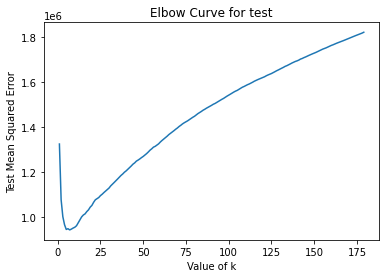

In [ ]:
# plotting the Elbow curve
plt.plot(k, test)
plt.xlabel('Value of k')
plt.ylabel('Test Mean Squared Error')
plt.title('Elbow Curve for test')

In [ ]:
#Drawing another Elbow curve on shorter range of k value
#Our aim: to find k for which error is min
k=range(1,25)   #understood this range from above graph
test = Elbow(k)
  

Text(0.5, 1.0, 'Elbow Curve for test')

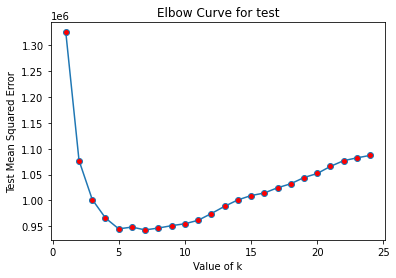

In [ ]:
# plotting the Curve for smaller values of k
plt.plot(k, test, marker='o',markerfacecolor='red',markersize=6)
plt.xlabel('Value of k')
plt.ylabel('Test Mean Squared Error')
plt.title('Elbow Curve for test')

Now, we will get the best k

In [ ]:
k_min=1
count=1
min_mse=1000000000
for x in test:
  if x<min_mse:
    min_mse=x
    k_min=count
  count=count+1     

k_min  #value of k for which MSE is minimum

7

In [ ]:
# Creating final instance of KNN with number of neighbors(k) = 7
reg = KNN(n_neighbors = 7)

# Fitting the model
reg.fit(x_train, y_train)

test_predict = reg.predict(x_test)
k = mse(test_predict, y_test)
print('Test MSE    ', k )  #This is the least MSE


Test MSE     943157.9680086719


In [ ]:
#predictions on test data
knn_reg_pred = reg.predict(x_test)
knn_reg_pred

array([1549.28571429, 4687.57142857,  569.42857143, ..., 5125.85714286,
       4400.        , 1170.85714286])

In [ ]:
reg.score(pd.DataFrame(x_test), pd.DataFrame(y_test))  #score on test data

0.9406300413813425

Do we need to normalise data? [If so Does it make any difference?].

Answer:

Here, we do not need to normalize data. This is because after mapping values of every feature to integers, there is not a very big difference in their values.
I tried with normalisation, but got same accuracy.

Mean Squared Error(MSE), Mean-Absolute-Error(MAE), R-squared (R2) score in a tabular form.

In [ ]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score as r2

MSE = mse(test_predict, y_test)
MAE = mse(test_predict, y_test)
R2 = r2(test_predict, y_test)

In [ ]:
lis1=[]
lis1.append(MSE)
lis2=[]
lis2.append(MAE)
lis3=[]
lis3.append(R2)
df=pd.concat([pd.DataFrame(lis1),pd.DataFrame(lis2),pd.DataFrame(lis3)], axis=1, keys=['MSE', 'MAE', 'R2'])
df

,MSE,MAE,R2
,0,0,0
0,943157.968009,943157.968009,0.930966


# **2)** **Linear Regression**

Dataset - same as above (Diamond Price Detection)


Implement a Linear Regression model (from the scratch) taking suitable independent variables from the dataset. 



In [ ]:
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,0,1,1,61.5,55.0,326,3.95,3.98,2.43
1,0.21,1,1,0,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2,1,2,56.9,65.0,327,4.05,4.07,2.31
3,0.29,1,5,3,62.4,58.0,334,4.20,4.23,2.63
4,0.31,2,6,1,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,0,0,0,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,2,0,0,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,3,0,0,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,1,4,1,61.0,58.0,2757,6.15,6.12,3.74


In [ ]:
#separating independent and dependent variables
x = data.drop(['price'], axis=1)
y = data['price']

In [ ]:
# Importing the train test split function
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.40,random_state=101) #train:test =60:40

In [ ]:
x_train


,carat,cut,color,clarity,depth,table,x,y,z
2770,0.70,3,2,4,63.3,56.0,5.70,5.64,3.59
48458,0.51,0,3,5,62.7,55.0,5.08,5.10,3.19
49437,0.60,0,3,2,60.2,57.0,5.49,5.54,3.32
47875,0.52,3,3,5,61.8,59.0,5.13,5.16,3.18
11215,0.90,3,2,2,62.5,58.0,6.10,6.15,3.83
...,...,...,...,...,...,...,...,...,...
5695,0.74,0,1,2,62.2,55.0,5.79,5.82,3.61
8006,1.01,1,3,1,60.1,61.0,6.60,6.55,3.95
17745,1.00,3,1,0,63.0,54.0,6.36,6.40,4.02
17931,1.00,3,3,5,62.1,59.0,6.34,6.45,3.97


In [ ]:
y_train

2770     3252
48458    1976
49437    2109
47875    1911
11215    4961
         ... 
5695     3888
8006     4327
17745    7145
17931    7242
45919    1721
Name: price, Length: 32364, dtype: int64

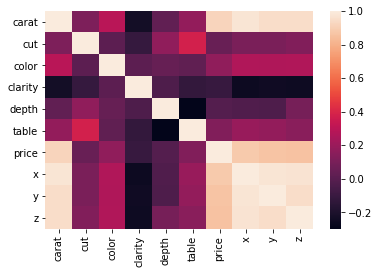

In [ ]:
# to find the correlation among the features (actual values shown in next cell)
sns.heatmap(data.corr())
# So, clearly here, the features that are most highly correlated to 'price' are: 'carat', 'x', 'y', 'z'
# So, these 4 are the best suitable features that can be used to predict the price 

In [ ]:
data.corr()  # Actual values of Correlation Coefficients
# Clearly, 'carat' is the one having highest correlation coefficient against 'price'

,carat,cut,color,clarity,depth,table,price,x,y,z
carat,1.000000,0.114426,0.291437,-0.225369,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
cut,0.114426,1.000000,0.016109,-0.110277,0.169916,0.381988,0.049421,0.105361,0.105319,0.126726
color,0.291437,0.016109,1.000000,0.014859,0.047279,0.026465,0.172511,0.270287,0.263584,0.268227
clarity,-0.225369,-0.110277,0.014859,1.000000,-0.032254,-0.119605,-0.104237,-0.251062,-0.243408,-0.247386
depth,0.028224,0.169916,0.047279,-0.032254,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,0.381988,0.026465,-0.119605,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,0.049421,0.172511,-0.104237,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,0.105361,0.270287,-0.251062,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,0.105319,0.263584,-0.243408,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.126726,0.268227,-0.247386,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


In [ ]:
# Taking X='carat' (independent var.); Y='price' (dependent var.)
# Considering 'carat' as X as its correlation coefficient against 'price' is the highest 
X=x_train['carat'].values
Y=y_train.values

In [ ]:
# Mean of X and Mean of Y
mean_x = np.mean(X)
mean_y = np.mean(Y)

#Total number of values
m=len(X)

# Using the formula to calculate b1 and b2
numer=0
denom=0
for i in range(m):
  numer+=(X[i]-mean_x) * (Y[i]-mean_y)
  denom+=(X[i]-mean_x) ** 2
b1 = numer/denom
b0 = mean_y - (b1 * mean_x)

# Print coefficients
print(b1,b0)    # b1=m, b0=c in Y= mX + c
# Model is ready

7753.653528953123 -2254.778361302591


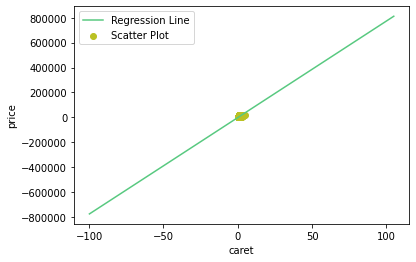

In [ ]:
# Plotting values and Regression Line

max_x = np.max(X) + 100
min_x = np.min(X) - 100

#Calculating line values x and y
x = np.linspace(min_x, max_x, 1000)
y = b0 + b1*x

#Plotting Line
plt.plot(x, y, color='#58c980', label='Regression Line')
#Plotting Scatter Points
plt.scatter(X, Y, c='#bac123', label='Scatter Plot')

plt.xlabel('caret')
plt.ylabel('price')
plt.legend()
plt.show()

In [ ]:
#Calculating R^2 value to check how good our model is
ss_t = 0  #total sum of squares
ss_r = 0  #total sum of square of residuals
for i in range(m):
  y_pred = b0 + b1 * X[i]
  ss_t += (Y[i] - mean_y) ** 2
  ss_r += (Y[i] - y_pred) ** 2
r2 = 1 - (ss_r/ss_t)
print(r2)  

0.8499044891304399


# Linear Regression using sklearn 




In [ ]:
# Implementing Linear Regression from sklearn library

In [ ]:

from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [ ]:
#change to dataframe variables
Carat = pd.DataFrame(x_train['carat'])
Price = pd.DataFrame(y_train)

In [ ]:
#build Linear Regression Model
lm = linear_model.LinearRegression()
model = lm.fit(Carat, Price)

In [ ]:
model.coef_

array([[7753.65352895]])

In [ ]:
model.intercept_

array([-2254.7783613])

In [ ]:
model.score(pd.DataFrame(x_test['carat']), pd.DataFrame(y_test))  #Evaluate the model

0.8484664044523382

In [ ]:
#Predict values of test data based on values of 'carat' 
X = x_test['carat'].values
X=pd.DataFrame(X)
Y=model.predict(X)
lin_pred=Y
Y=pd.DataFrame(Y)
df=pd.concat([X,Y], axis=1, keys=['carat_test', 'price_predicted'])
df


,carat_test,price_predicted
,0,0
0,0.51,1699.584938
1,1.06,5964.094379
2,0.33,303.927303
3,0.31,148.854233
4,2.04,13562.674838
...,...,...
21571,1.51,9453.238467
21572,0.72,3327.852180
21573,0.86,4413.363674


Comparison between KNN regression and Linear Regression. What are the differences observed? Which is better and why. 

Answer:

R2 for KNN Regression = **0.930966**

R2 for Linear Regression = **0.8499044**

Score for KNN Regression (on test data) = **0.940630**

Score for Linear Regression (on test data) = **0.848466**

So, obviously, in this case, **KNN regression** is better.


Comparing the predicted values from KNN regression, Linear Regression


In [ ]:
A=pd.DataFrame(knn_reg_pred)
B=pd.DataFrame(lin_pred)

df=pd.concat([A,B], axis=1, keys=['KNN_pred', 'Lin_Reg_pred'])
df

,KNN_pred,Lin_Reg_pred
,0,0
0,1549.285714,1699.584938
1,4687.571429,5964.094379
2,569.428571,303.927303
3,540.285714,148.854233
4,15859.571429,13562.674838
...,...,...
21571,10265.428571,9453.238467
21572,3489.428571,3327.852180
21573,5125.857143,4413.363674


#**KNN Classifier**

In this problem you are required to train, test and validate a K-Nearest Neighbor Classifier on the famous CIFAR-10 dataset. The next few cells will guide you through the process. Follow along...

In [2]:
# Run some setup code for this notebook.

import random
import numpy as np
import matplotlib.pyplot as plt
import os


from __future__ import print_function

from builtins import range
from six.moves import cPickle as pickle
from imageio import imread
import platform

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
# Download the dataset
!wget http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz -O cifar-10-python.tar.gz
!tar -xzvf cifar-10-python.tar.gz
!rm cifar-10-python.tar.gz

--2021-03-12 04:48:53--  http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170498071 (163M) [application/x-gzip]
Saving to: ‘cifar-10-python.tar.gz’

cifar-10-python.tar 100%[===================>] 162.60M  16.4MB/s    in 11s     

2021-03-12 04:49:05 (14.5 MB/s) - ‘cifar-10-python.tar.gz’ saved [170498071/170498071]

cifar-10-batches-py/
cifar-10-batches-py/data_batch_4
cifar-10-batches-py/readme.html
cifar-10-batches-py/test_batch
cifar-10-batches-py/data_batch_3
cifar-10-batches-py/batches.meta
cifar-10-batches-py/data_batch_2
cifar-10-batches-py/data_batch_5
cifar-10-batches-py/data_batch_1


In [15]:
# This cell loads the training and testing dataset. Please note the variables at
# the end of the cell as you would require them to access the train/test data 
# and labels throughout the assignment
def load_pickle(f):
    version = platform.python_version_tuple()
    if version[0] == '2':
        return  pickle.load(f)
    elif version[0] == '3':
        return  pickle.load(f, encoding='latin1')
    raise ValueError("invalid python version: {}".format(version))
  
def load_CIFAR_batch(filename):
    """ load single batch of cifar """
    with open(filename, 'rb') as f:
        datadict = load_pickle(f)
        X = datadict['data']
        Y = datadict['labels']
        X = X.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("float")
        Y = np.array(Y)
        return X, Y

def load_CIFAR10(ROOT):
    """ load all of cifar """
    xs = []
    ys = []
    for b in range(1,6):
        f = os.path.join(ROOT, 'data_batch_%d' % (b, ))
        X, Y = load_CIFAR_batch(f)
        xs.append(X)
        ys.append(Y)
    Xtr = np.concatenate(xs)
    Ytr = np.concatenate(ys)
    del X, Y
    Xte, Yte = load_CIFAR_batch(os.path.join(ROOT, 'test_batch'))
    return Xtr, Ytr, Xte, Yte


cifar10_dir = 'cifar-10-batches-py'

# Cleaning up variables to prevent loading data multiple times
try:
   del X_train, y_train
   del X_test, y_test
   print('Clear previously loaded data.')
except:
   pass

X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

# As a sanity check, we print out the size of the training and test data.
print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Clear previously loaded data.
Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


In [20]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Next we visualize the CIFAR-10 dataset. Although these functions are being written for you, we highly recommend you go through the code and make yourself familiar as these are things you will be required to do very often when working on AI/ML projects

> Indented block

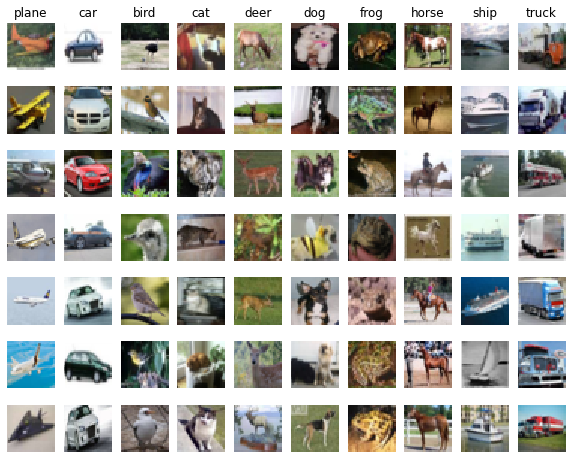

In [26]:
# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In the next cell we flatten each image into a single dimensional vector so that it is easy to process. You should be able to reason about the dimensions comfortable.

In [27]:
# Subsample the data for more efficient code execution in this exercise
num_training = 5000
mask = list(range(num_training))
X_train = X_train[mask]
y_train = y_train[mask]

num_test = 500
mask = list(range(num_test))
X_test = X_test[mask]
y_test = y_test[mask]

# Reshape the image data into rows
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
print(X_train.shape, X_test.shape)

(5000, 3072) (500, 3072)


In [59]:
type(y_train[0])

numpy.int64

In [52]:

traindata = np.hstack((X_train, np.atleast_2d(y_train).T))
testdata = np.hstack((X_test, np.atleast_2d(y_test).T))


In [56]:
print(traindata.shape)
print(testdata.shape)

(5000, 3073)
(500, 3073)


In [39]:
# euclidean distance calcualtion
import math
def euclideanDistance(instance1, instance2, length):
	distance = 0
	for x in range(length):
		distance += pow((instance1[x] - instance2[x]), 2)
	return math.sqrt(distance)


In [40]:
# selecting subset with the smallest distance (i.e, neighbors)
import operator 
def getNeighbors(trainingSet, testInstance, k):
	distances = []
	length = len(testInstance)-1
	for x in range(len(trainingSet)):
		dist = euclideanDistance(testInstance, trainingSet[x], length)
		distances.append((trainingSet[x], dist))
	distances.sort(key=operator.itemgetter(1))
	neighbors = []
	for x in range(k):
		neighbors.append(distances[x][0])
	return neighbors

In [41]:
# Predicted response
def getResponse(neighbors):
	classVotes = {}
	for x in range(len(neighbors)):
		response = neighbors[x][-1]
		if response in classVotes:
			classVotes[response] += 1
		else:
			classVotes[response] = 1
	sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
	return sortedVotes[0][0]

Now, let's check the accuracy for different values of k

Taking k = 3

In [ ]:
k = 3
predictions=[]
for x in range(len(testdata)):
  neighbors = getNeighbors(traindata, testdata[x], k)
  result = getResponse(neighbors)
  predictions.append(result)
  #print('Predicted label=' , int(result), ', Actual label=', int(testdata[x][-1])) 

In [77]:
print('Accuracy on test data (for k = 3): ', accuracy_score(list(y_test),predictions))

Accuracy on test data (for k = 3):  0.6449444724732


Taking k = 5

In [76]:
k = 5
predictions=[]
for x in range(len(testdata)):
  neighbors = getNeighbors(traindata, testdata[x], k)
  result = getResponse(neighbors)
  predictions.append(result)
  #print('Predicted label=' , int(result), ', Actual label=', int(testdata[x][-1])) 



In [73]:
print('Accuracy on test data (for k = 5): ', accuracy_score(list(y_test),predictions))

Accuracy on test data (for k = 5):  0.7749444367277327


Taking k = 7

In [ ]:
k = 7
predictions=[]
for x in range(len(testdata)):
  neighbors = getNeighbors(traindata, testdata[x], k)
  result = getResponse(neighbors)
  predictions.append(result)
  #print('Predicted label=' , int(result), ', Actual label=', int(testdata[x][-1])) 

In [78]:
print('Accuracy on test data (for k = 7): ', accuracy_score(list(y_test),predictions))

Accuracy on test data (for k = 7):  0.66498447147325


So, as we can see, **k=5** gave the highest accuracy on test data

 Is KNN a linear classifier or can it learn any boundary?

 Ans: **No**, KNN is not a linear classifier and it can learn non-linear boundaries. This is because the distance function used to find the k nearest neighbors is not linear.




# **Decision Trees**

The Wisconsin Breast Cancer Dataset(WBCD) can be found here(https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data)

This dataset describes the characteristics of the cell nuclei of various patients with and without breast cancer. The task is to classify a decision tree to predict if a patient has a benign or a malignant tumour based on these features.

Attribute Information:
```
#  Attribute                     Domain
   -- -----------------------------------------
   1. Sample code number            id number
   2. Clump Thickness               1 - 10
   3. Uniformity of Cell Size       1 - 10
   4. Uniformity of Cell Shape      1 - 10
   5. Marginal Adhesion             1 - 10
   6. Single Epithelial Cell Size   1 - 10
   7. Bare Nuclei                   1 - 10
   8. Bland Chromatin               1 - 10
   9. Normal Nucleoli               1 - 10
  10. Mitoses                       1 - 10
  11. Class:                        (2 for benign, 4 for malignant)
```


In [ ]:
# Get the file
downloaded = drive.CreateFile({'id': '18jAlYCk-2wp1giieT4x10-kEO9XM_IAc'}) # replace the id with id of file you want to access
downloaded.GetContentFile('breast-cancer-wisconsin.data.csv')

In [ ]:
data = pd.read_csv('breast-cancer-wisconsin.data.csv')
data.shape

(699, 11)

In [ ]:
#checking missing values in the data
data.isnull().sum()

1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
dtype: int64

In [ ]:
data.dtypes

1      int64
2      int64
3      int64
4      int64
5      int64
6      int64
7     object
8      int64
9      int64
10     int64
11     int64
dtype: object

In [ ]:
y=data['7']
y.unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

In [ ]:
def rep7(x):
  if x == '1':
    return 1
  elif x == '2':
    return 2
  elif x == '3':
    return 3
  elif x == '4':
    return 4
  elif x == '5':
    return 5
  elif x == '6':
    return 6
  elif x == '7':
    return 7
  elif x == '8':
    return 8
  elif x == '9':
    return 9
  elif x == '10':
    return 10
  elif x == '?':
    return 11
                  

In [ ]:
data['7']=data['7'].apply(rep7)  #for converting from 'object' type to 'int' type

In [ ]:
data.dtypes

1     int64
2     int64
3     int64
4     int64
5     int64
6     int64
7     int64
8     int64
9     int64
10    int64
11    int64
dtype: object

In [ ]:
data.head()

,1,2,3,4,5,6,7,8,9,10,11
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [ ]:
data.describe()

,1,2,3,4,5,6,7,8,9,10,11
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.715308,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,3.770711,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,8.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,11.000000,10.000000,10.000000,10.000000,4.000000


In [ ]:
#seperating independent and dependent variables
x = data.drop(['11'], axis=1)
y = data['11']
x.shape, y.shape

((699, 10), (699,))

In [ ]:
# Importing the train test split function
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.40,random_state=101) #train:test =60:40

In [ ]:
#importing decision tree classifier (as here, the target variable is a categorical variable)
from sklearn.tree import DecisionTreeClassifier

Using gini as the splitting metric

In [ ]:
#creating the decision tree function
dtree_model = DecisionTreeClassifier(random_state=40)

In [ ]:
#fitting the model
dtree_model.fit(x_train, y_train)  #using gini as the splitting metric

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=40, splitter='best')

In [ ]:
#checking the score on train data
dtree_model.score(x_train, y_train)

1.0

In [ ]:
#checking the score on test data
dtree_model.score(x_test, y_test)

0.9357142857142857

In [ ]:
#predictions on test data
dtree_model.predict(x_test)

array([4, 2, 2, 2, 4, 4, 4, 2, 4, 2, 4, 2, 4, 4, 2, 2, 2, 2, 4, 4, 4, 4,
       2, 2, 2, 4, 4, 2, 2, 2, 4, 2, 4, 2, 4, 2, 4, 4, 2, 2, 4, 2, 4, 2,
       4, 2, 4, 4, 2, 2, 2, 2, 4, 2, 2, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 4,
       2, 4, 4, 2, 4, 2, 2, 2, 4, 4, 4, 4, 2, 4, 4, 2, 4, 2, 2, 2, 2, 4,
       2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2,
       2, 2, 2, 4, 2, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 4,
       2, 4, 4, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2, 4, 4, 2, 2, 4, 4, 2, 2, 2,
       4, 4, 4, 4, 4, 2, 2, 4, 4, 2, 2, 4, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2,
       2, 4, 4, 4, 2, 2, 4, 2, 4, 2, 2, 2, 2, 4, 4, 2, 4, 2, 4, 2, 2, 4,
       2, 2, 2, 4, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 4, 4, 2, 2, 2, 2, 2, 4,
       2, 2, 4, 2, 4, 2, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 4, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2, 4, 2, 4, 4, 4, 4, 2, 2,
       4, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4])

In [ ]:
# for drawing the decision tree
from sklearn import tree

In [ ]:
!pip install graphviz

In [ ]:
dec_tree = tree.export_graphviz(dtree_model,out_file='tree.dot',feature_names=x_train.columns,max_depth=12,filled=True)  
#here, max_depth is the max depth of the figure that we will draw (not, of actual tree)

In [ ]:
!dot -Tpng tree.dot -o tree.png

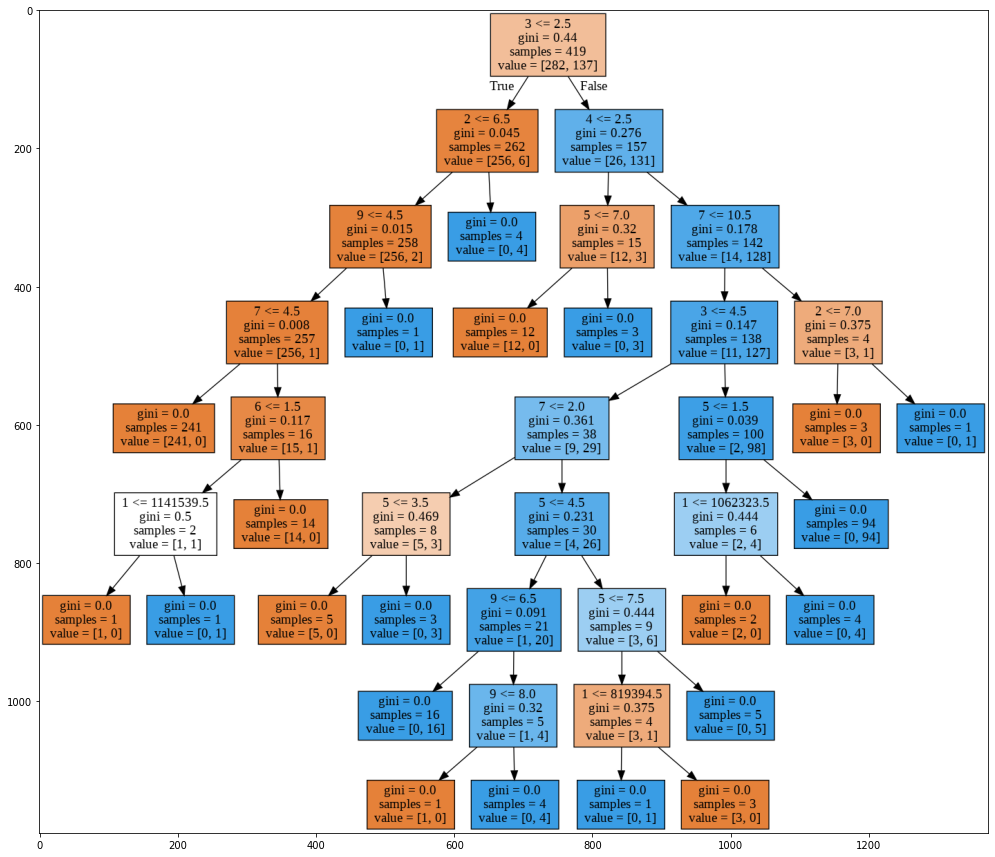

In [ ]:
image = plt.imread('tree.png')
plt.figure(figsize=(17,17))
plt.imshow(image)

Using Entropy as the splitting metric

In [ ]:
#creating the decision tree function
dtree_model = DecisionTreeClassifier(random_state=40, criterion='entropy')

In [ ]:
#fitting the model
dtree_model.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=40, splitter='best')

In [ ]:
#checking the score on train data
dtree_model.score(x_train, y_train)

1.0

In [ ]:
#checking the score on test data
dtree_model.score(x_test, y_test)

0.9392857142857143

So, Entropy as splitting metric is giving better score 

In [ ]:
dec_tree = tree.export_graphviz(dtree_model,out_file='tree.dot',feature_names=x_train.columns,max_depth=12,filled=True)  
#here, max_depth is the max depth of the figure that we will draw (not, of actual tree)

In [ ]:
!dot -Tpng tree.dot -o tree.png

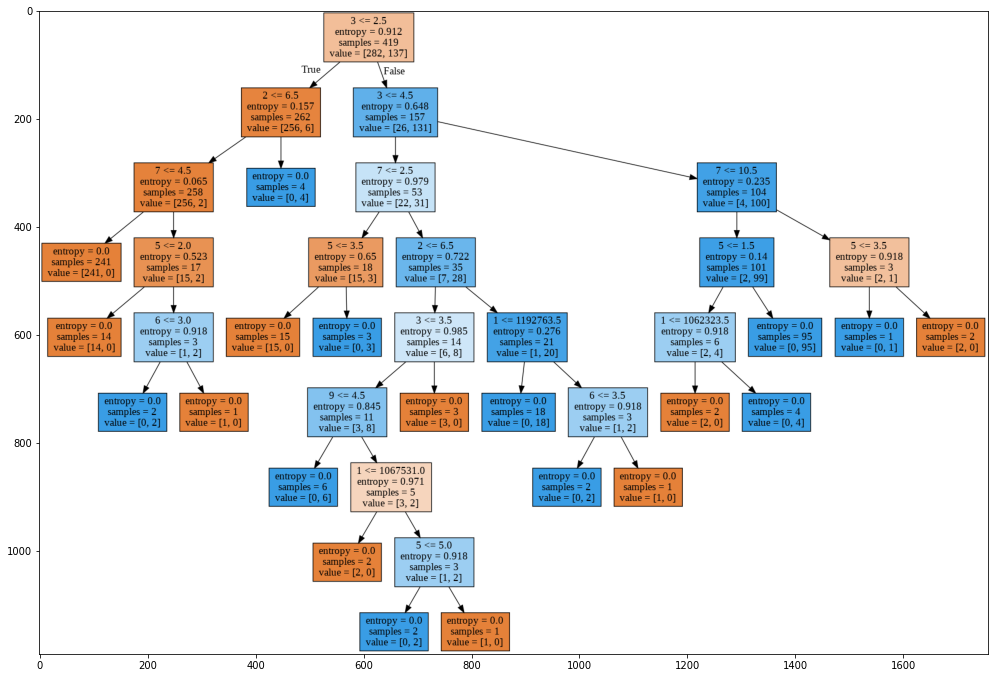

In [ ]:
image = plt.imread('tree.png')
plt.figure(figsize=(17,17))
plt.imshow(image)


Advantages and disadvantages of decision trees based on the above question.

Answer: 

**Advantages**

1)Compared to other algorithms decision trees requires less effort for data preparation during pre-processing.

2)A decision tree does not require normalization of data.

3)A decision tree does not require scaling of data as well.

4)A Decision tree model is very intuitive and easy to explain.


**Disadvantages**

1)A small modification in the data can cause a large change in the structure of the decision tree which can cause instability.

2)Decision tree often involves higher time to train the model.

3)Training a decision tree is relatively expensive as the complexity and time taken are more.